# Analysis and hypothesis testing of student scores to identify the factors influencing their performances.

Rituparna Basu Sept, 2022

# Introduction and benefit:
Effective education is a critical component for success of any community regardless of its socio-economic conditions. Till date, scores in exams are considered as standard criteria across communities for evaluating progress of individual students along with the efficacy of the educational system. Hence, all responsible and related parties are always keen to understand what affects students’ scores. Having an experience as a college and high school educator, this issue of student evaluation and its controlling factors are close to my heart. 

I identified a dataset consisting of students scores in various key skill areas along with their background information, while searching through Kaggle (kaggle.com) and immediately got interested in it as we can do several analyses and hypothesis testing to identify what are the key factors that contribute to the students’ performance in this sample of the dataset. This is a key question also for all institutes related to education, and understanding this relationship is critical for several reasons. It can help to design educational policies, socio-economic policies, political agenda, teaching approach and focus groups for specific subject areas. Therefore, based on the interest and provided information, the following research questions and path froward has been developed.
 
 
# Business objectives:

1. To investigate relationships between scores in different subjects, students’ gender, ethnic, parental education, and financial backgrounds, to identify which factor(s) influence the students’ performances the most. 

2. Statistics of the scores, such as, mean, median, range and outliers will be estimated by various methods and compared among students' backgrounds to arrive at conclusions about which category or factor may be the most influential in students’ performance, if any.

3. Recommendations will be made for further study or steps based on the results above.

### Data dictionary:

CSV file available with following data

1. gender - If the individual is male or female.
2. race/ethnicity - If the individual belongs to race/ethnicity A, B, C, D, or E.
3. parental level of education - This represents parental education level (high school, some high school, some college,   bachelor's degree, associate's degree or master's degree).
4. lunch - If the individual has standard lunch or free/reduced lunch .
5. test preparation course - If the individual completed a test prepration or had no test preparation.
6. math score - This represents individual's overall math score.
7. reading score - This represents individual's overall reading score.
8. writing score - This represents individual's overall writing score.

### Import the necessary libraries - pandas, numpy, seaborn, matplotlib.pyplot, scipy.stats

In [25]:
# Set up environment

import math
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats

import matplotlib.pyplot as plt


%matplotlib inline

# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')



### Read in the dataset

In [29]:
# Read in the data

sdf = pd.read_csv("studperf.csv")

## 1. Check the dataset

In [30]:
# Get to know the data a bit

sdf.info()   #information of the data

sdf.head()   #view the header(first five rows)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [31]:
sdf.shape   # checking columns and rows

(1000, 8)

In [32]:
sdf.isna().sum()  # checking missing values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### 1.1 Observations: 
The dataset looks clean and consistent. It has 1000 observations (i.e., rows) of 8 variables (columns). No missing values, so, each variable has 1000 observations. 

### Check the datatype of the variables to make sure that the data is read in properly

In [33]:
sdf.dtypes #checking data again

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

### 1.2 Observations: 
1. gender, race/ethnicity, parental level of education, lunch, and test preparation course are in object data type
2. math score, reading score, and writing score is integer data type 


In [34]:
# Lets rename the column names for ease of use
sdf.rename(columns={'race/ethnicity': 'race', 
                    'parental level of education': 'parentedu', 
                    'test preparation course': 'testprep',
                    'math score': 'mscore',
                    'reading score': 'rscore',
                    'writing score': 'wscore'}, inplace=True)

In [35]:
sdf.head()  #read header with new column names

,gender,race,parentedu,lunch,testprep,mscore,rscore,wscore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [36]:
# How many unique entries

print("Gender entries", sdf.gender.nunique()) 
print("Race entries", sdf.race.nunique())     
print("Parent Education", sdf.parentedu.nunique())  
print("Lunch", sdf.lunch.nunique())
print("Test Prep", sdf.testprep.nunique())


Gender entries 2
Race entries 5
Parent Education 6
Lunch 2
Test Prep 2


### 1.3 Observations: 
* This helped to crosscheck data we have from 1000 data. 
* There are 5 groups for race and the parent education column has six groups, the lunch column has 2 groups and the test preparation column has 2 groups.  



## 2. EDA
lets dive into data analysis

In [37]:
#Lets create a combined Boxplot and Distplot

def histogram_boxplot(feature, figsize=(5,3), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2,          # Number of rows of the subplot grid= 2
                                           sharex = True,       # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           )                    # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='yellow') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=True, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--')   # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-')

In [38]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

### 2.1 Univariate plot 

,mscore,rscore,wscore
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


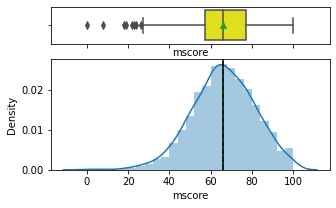

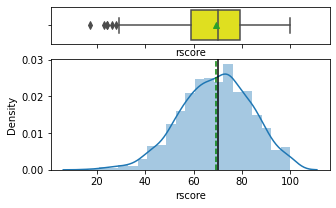

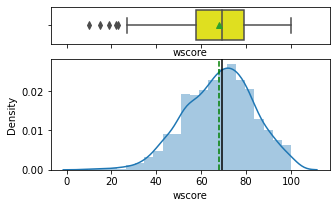

In [39]:
histogram_boxplot(sdf.mscore)
histogram_boxplot(sdf.rscore)
histogram_boxplot(sdf.wscore)
sdf.describe() # Analyze the statistics for scores

All data: Overall data looks normally distributed with mean and mode very close and with only a slight left skewness. For math score the mean is at 66.089 with standard deviation 15.16308. For reading score the mean is at 69.169 with standard deviation 14.60019. For writing score the mean is at 68.054 with standard deviation 15.19566.

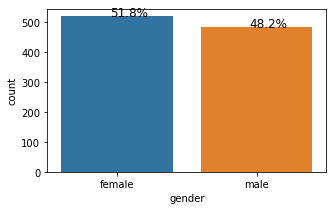

In [40]:
plt.figure(figsize=(5,3))
ax = sns.countplot(sdf["gender"])
perc_on_bar(ax,sdf["gender"])

All data: Female count is more than male count. On average they are close to 50%.

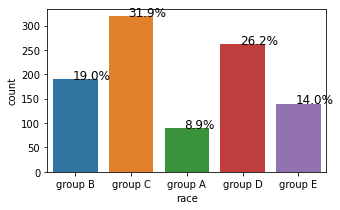

In [41]:
plt.figure(figsize=(5,3))
ax = sns.countplot(sdf["race"])
perc_on_bar(ax,sdf["race"])

Proportion of different racial groups varies. Group C has the most count and Group A has the least count.

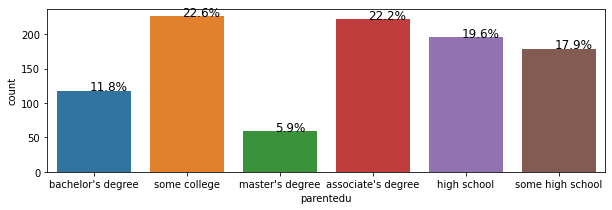

In [42]:
plt.figure(figsize=(10,3))
ax = sns.countplot(sdf["parentedu"])
perc_on_bar(ax,sdf["parentedu"])

Parental education information shows that 'master's degree' has the least count. This is followed by the next two groups belonging to 'high school' and 'some high school'.  Groups belonging to 'some college' and 'associate's degree' have the same count.

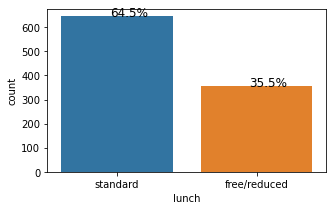

In [43]:
plt.figure(figsize=(5,3))
ax = sns.countplot(sdf["lunch"])
perc_on_bar(ax,sdf["lunch"])

Counts for standard lunch are almost double than the count for free/reduced lunch. If we consider this as an indicative of the family's financial background then this is a critical factor to study to find out whether it has any direct implication on the scores. 

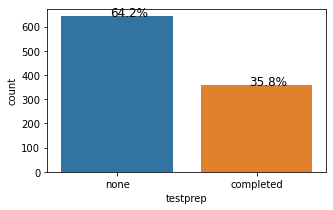

In [44]:
plt.figure(figsize=(5,3))
ax = sns.countplot(sdf["testprep"])
perc_on_bar(ax,sdf["testprep"])

Counts for the group who opted for a test preparation (36%) is almost half the count for the group which did not do a test preparation (64%).

### 2.2  Multivariate plots

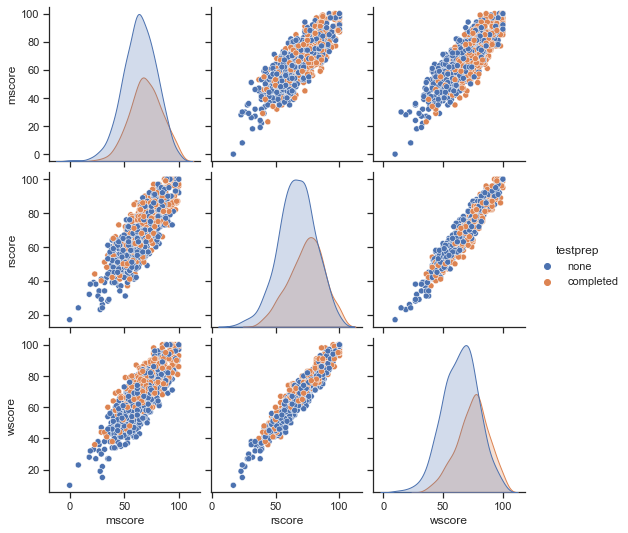

In [123]:
sns.pairplot(sdf, hue='testprep') # check all data, the whole numeric set of data at one time w.r.t. testprep

Pairplot shows mscore, rscore and wscore are more for the group who completed testprep.

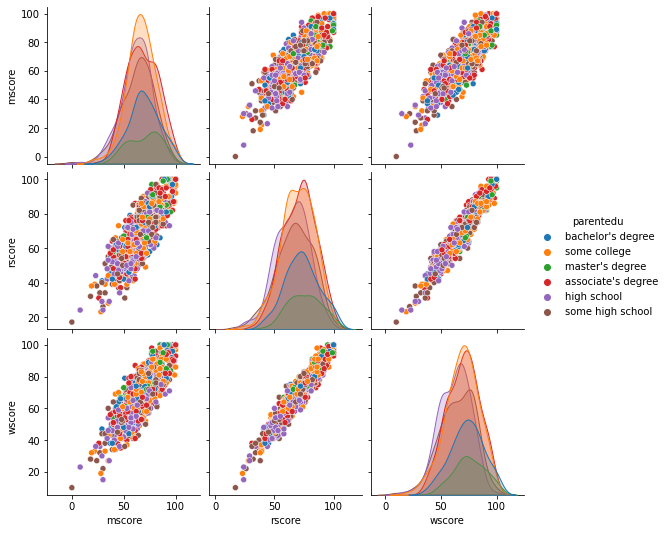

In [46]:
sns.pairplot(sdf, hue='parentedu') # check all data, the whole numeric set of data at one time w.r.t. parentedu

Pairplot does not provide lot of insight

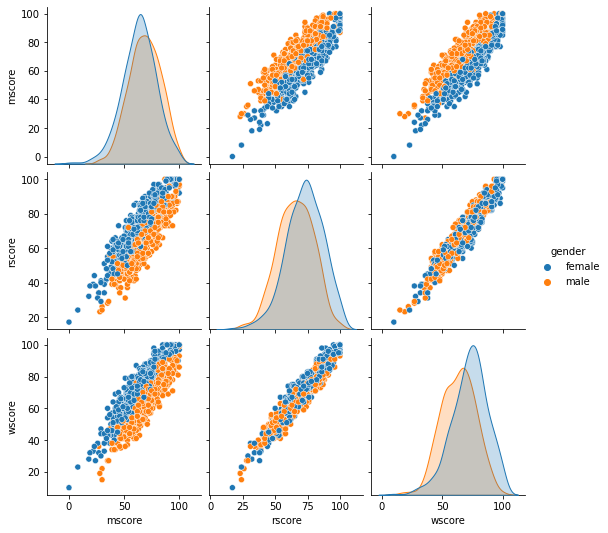

In [47]:
sns.pairplot(sdf, hue='gender') # check all data, the whole numeric set of data at one time w.r.t. gender

Pairplot shows mscore is more for males and both rscore and wscore are more for the females.

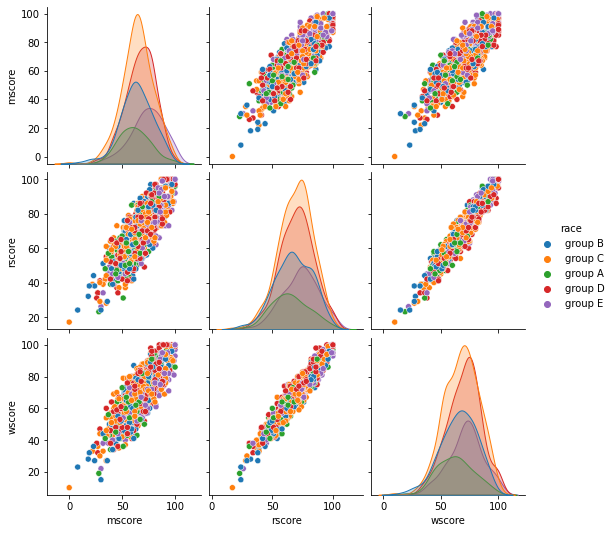

In [48]:
sns.pairplot(sdf, hue='race') # check all data, the whole numeric set of data at one time w.r.t. race

Pairplot shows mscore, rscore and wscore is less for Group A.

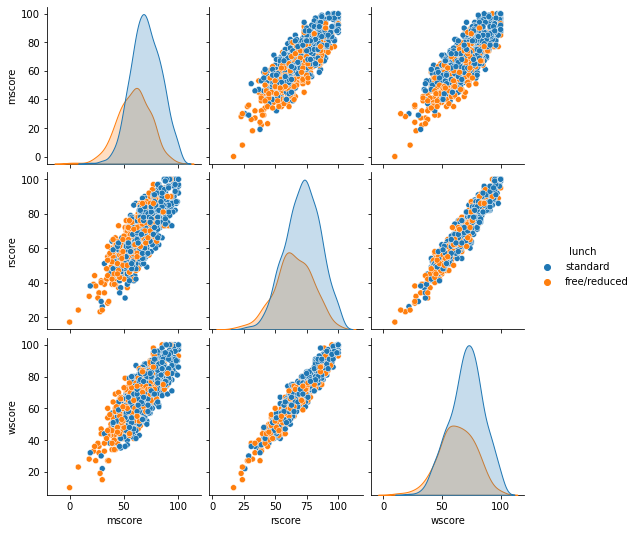

In [49]:
sns.pairplot(sdf, hue='lunch') # check all data, the whole numeric set of data at one time w.r.t. lunch

Pairplot shows mscore, rscore and wscore are more for the group which has standard lunch.
Subject score medians are slightly lower for the students who had free or reduced lunches.

Overall data looks normally distributed with mean and mode coinciding. For math score the mean is at 66.089 with standard deviation 15.16308. 

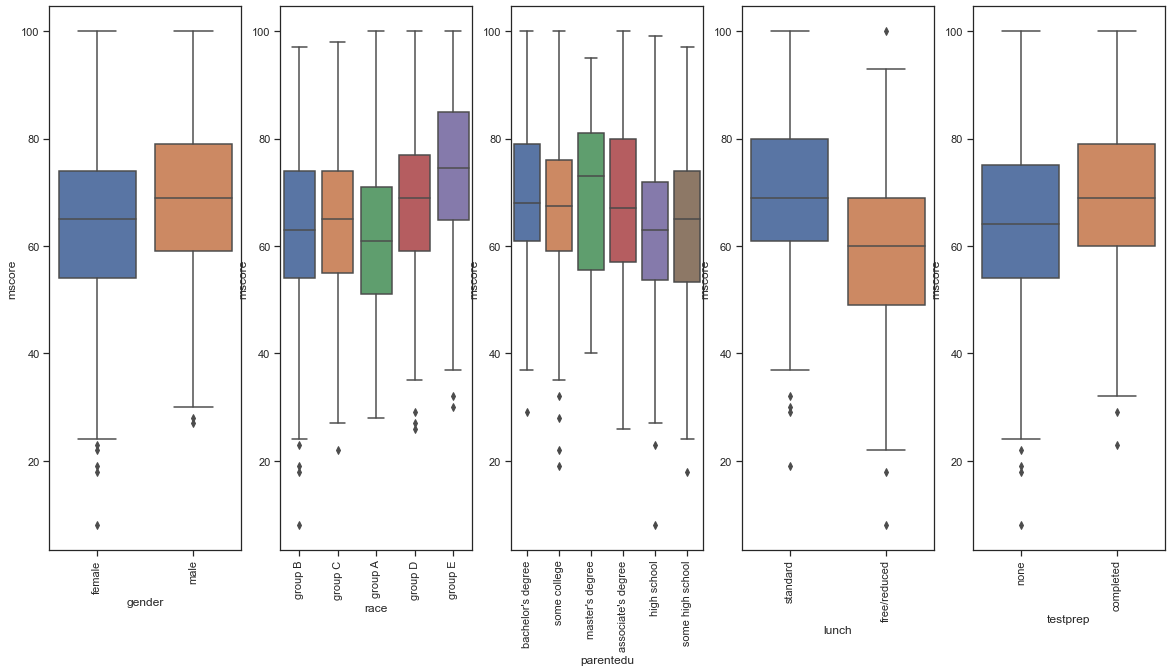

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,10))

for i, c in enumerate(variables, 1):
    plt.subplot(1,5,i) 
    g = sns.boxplot(x=c, y="mscore",data=sdf.query("mscore>0"))
    plt.xticks(rotation=90)
    #g.set(yscale="log")

* Mean mscore is higher for male. There is considerable overlap of the IQR between male and female. Spread of score for both is similar except a few outliers.

* There is overlap of the IQR from all groups. Spread of score is more for master's degree. Mean mscore is high (69) for master's and bachelor's degree. Mean mscore for associate's and some college degree is around 67. Mean mscore is around 63 for high school and some high school group. 

* Mean mscore is higher for the group who completed test prep. There is considerable overlap of the IQR from none and completed test prep. Spread of score for both is similar except a few outliers. 

* Statistical tests are necessary to confirm the significance of diffrence, especially for the ones with IOR overlap.

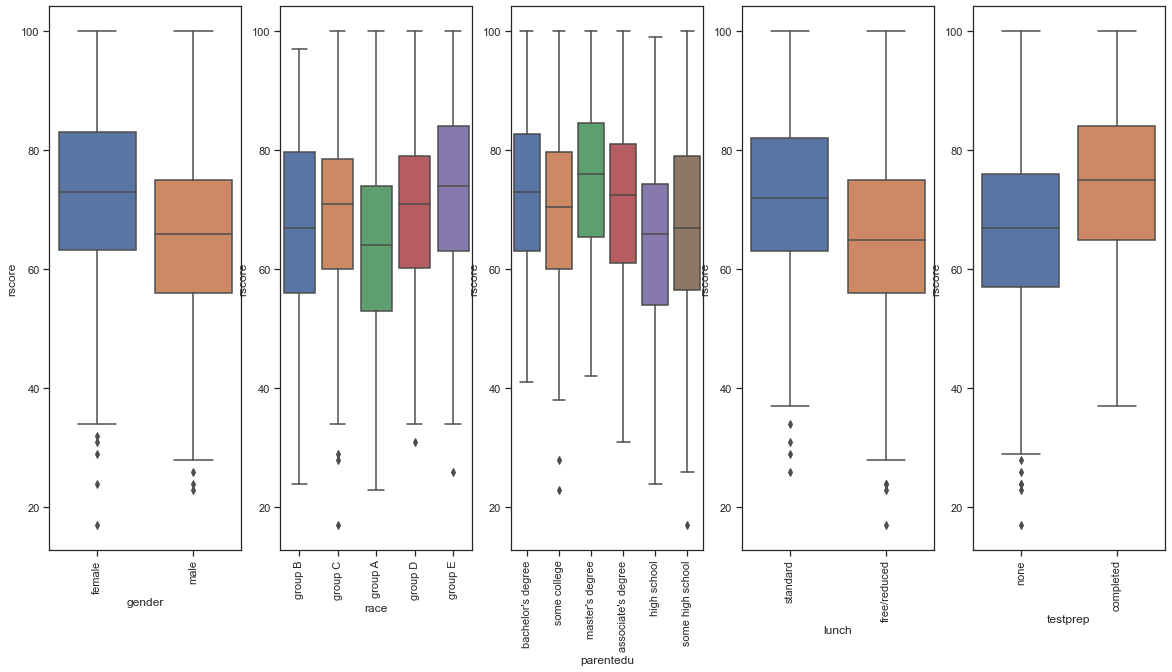

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,10))

for i, c in enumerate(variables, 1):
    plt.subplot(1,5,i) 
    g = sns.boxplot(x=c, y="rscore",data=sdf.query("rscore>0"))
    plt.xticks(rotation=90)
    #g.set(yscale="log")

* Mean rscore is higher for female. There is considerable overlap of the IQR between male and female. Spread of score for both is similar except a few outliers.

* There is overlap of the IQR from all groups. Spread of score is more for some high school. Mean rscore is high (69) for master's and bachelor's degree. Mean rscore for associate's and some college degree is around 67. Mean rscore is around 63 for high school and some high school group.

* Mean rscore is higher for the group who completed test prep. There is considerable overlap of the IQR from none and completed test prep. Spread of score for both is similar except a few outliers.

* Statistical tests are necessary to confirm the significance of diffrence, especially for the ones with IOR overlap. 



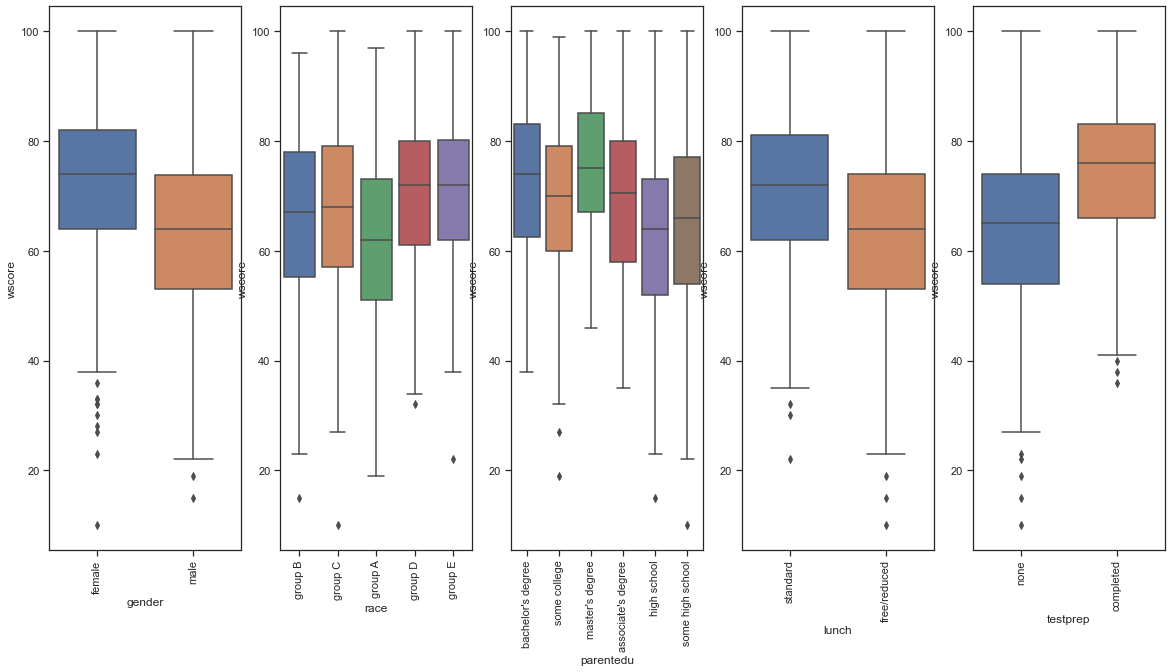

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,10))

for i, c in enumerate(variables, 1):
    plt.subplot(1,5,i) 
    g = sns.boxplot(x=c, y="wscore",data=sdf.query("wscore>0"))
    plt.xticks(rotation=90)
    #g.set(yscale="log")

* Mean wscore is higher for the group who completed test prep. Spread of wscore is tighther around the mean for completed test except a few outliers.

* There is overlap of the IQR from all groups. Spread of score is more for some high school. Mean rscore is high for master's (75) and bachelor's (73) degree. Mean rscore for associate's and some college degree is around 69. Mean rscore is around 63 for high school and 65 for some high school group.

* Mean wscore is higher for female. Spread of wscore is tighther around the mean for female except a few outliers.

* Statistical tests are necessary to confirm the significance of diffrence, especially for the ones with IOR overlap.

### 2.3 Insights: Summary of observations from EDA

* Typically, scores are higher when students opted for a test preparation.
* Female students scored higher in reading and writing while male students scored higher in math. 
* Students with parents who have higher degrees perform better, especially those with a parent having a master's degree.
* In terms of the race, group A performed consistently lower than all other groups while group E performed similar to or better than any other groups.
* Financial conditions also play a role. Students who availed lower cost or free lunches have scored generally lower.

**We need to perform statistical tests to investigate if the above observation are statistically significant.**

# 3. Statistical analyses to test if the differences or similarities observed are of statistical significance

### Introduction to T-test
T-test for 2 independent samples for equality of means with unequal standard deviations

#### Let's write the null and alternative hypothesis
Let $\mu_1, \mu_2$ be the mean scores of two groups.

We will test the null hypothesis


>$H_0:\mu_1=\mu_2$

against the alternate hypothesis



>$H_a:\mu_1  $$\neq$$  \mu_2$

#### T-Test assumptions:
* Continuous data
* Normally dsitributed
* Populations are independent - as the samples are random and independent we can assume the populations are also independent
* Standard Dev are different so the population standard dev can be assumed to be different.

#### Lets divide the dataframe to perform the above test for different categories

In [145]:
# Lets separate the dataframe based on gender
mdf= sdf[sdf['gender'].isin(['male'])]  # selected based on gender(male)
print(mdf.shape)
mdf.head()

(482, 8)


,gender,race,parentedu,lunch,testprep,mscore,rscore,wscore
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
10,male,group C,associate's degree,standard,none,58,54,52


In [146]:
# Lets separate the dataframe based on gender
fdf= sdf[sdf['gender'].isin(['female'])]  # selected based on gender (female)
print(fdf.shape)
fdf.head()

(518, 8)


,gender,race,parentedu,lunch,testprep,mscore,rscore,wscore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [147]:
# Lets separate the dataframe based on testprep
tpy_df= sdf[sdf['testprep'].isin(['completed'])]  # selected based on testprep completed
print(tpy_df.shape)
tpy_df.head()

(358, 8)


,gender,race,parentedu,lunch,testprep,mscore,rscore,wscore
1,female,group C,some college,standard,completed,69,90,88
6,female,group B,some college,standard,completed,88,95,92
8,male,group D,high school,free/reduced,completed,64,64,67
13,male,group A,some college,standard,completed,78,72,70
18,male,group C,master's degree,free/reduced,completed,46,42,46


In [148]:
# Lets separate the dataframe based on testprep
tpno_df= sdf[sdf['testprep'].isin(['none'])]  # selected based on testprep npt completed
print(tpno_df.shape)
tpno_df.head()

(642, 8)


,gender,race,parentedu,lunch,testprep,mscore,rscore,wscore
0,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78


### 3.1. Gender t-test

##### Hypothesis 
H₀: There is no significant difference between the scores of the two genders.

Hₐ: There is a significant difference between the scores of the two genders.


In [83]:
# Conduct the t-test for mscore

stats.ttest_ind(mdf['mscore'], fdf['mscore'])

Ttest_indResult(statistic=5.383245869828983, pvalue=9.120185549328822e-08)

We obtain a p-value < 0.05 from the two sample t-test. Conclude that performance of math score in male are female students are significantly different. Male students performed better in maths than female students. 

In [84]:
# Conduct the t-test for rscore

stats.ttest_ind(mdf['rscore'], fdf['rscore'])

Ttest_indResult(statistic=-7.959308005187657, pvalue=4.680538743933289e-15)

We obtain a p-value < 0.05 from the two sample t-test. Conclude that performance of reading score in male are female students are significantly different. Female students performed better in reading than male students. 

In [85]:
# Conduct the t-test for wscore

stats.ttest_ind(mdf['wscore'], fdf['wscore'])

Ttest_indResult(statistic=-9.979557910004507, pvalue=2.019877706867934e-22)

We obtain a p-value < 0.05 from the two sample t-test. Conclude that performance of writing score in male are female students are significantly different. Female students performed better in writing than male students. 

***The output of the t-test here yields a p-value < 0.05. So, we can reject the null hypothesis and conclude that performance of math, reading and writing scores in male are female students are significantly different. Male students performed better in maths while female students performed better in reading and writing.***

### 3.2. T-test for "test preparation"

#####  Hypothesis 
H₀: There is no significant difference between the scores of the two groups based on test preparation completed or not.

Hₐ: There is a significant difference between the scores of the two groups based on test preparation completed or not.


In [92]:
# Conduct the t-test for mscore

stats.ttest_ind(tpy_df['mscore'], tpno_df['mscore'])

Ttest_indResult(statistic=5.704616417349102, pvalue=1.5359134607147415e-08)

In [93]:
# Conduct the t-test for rscore

stats.ttest_ind(tpy_df['rscore'], tpno_df['rscore'])

Ttest_indResult(statistic=7.871663538941468, pvalue=9.081783336892205e-15)

In [94]:
# Conduct the t-test for wscore

stats.ttest_ind(tpy_df['wscore'], tpno_df['wscore'])

Ttest_indResult(statistic=10.409173436808748, pvalue=3.68529173524572e-24)

***The output of the t-test here yield a p-value < 0.05. So, we can reject the null hypothesis and conclude that students who did complete the test preparation had significantly better performance than the rest.***


### 3.3. Confidence Interval

In [149]:
# Confidence interval for mscore based on gender


def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(mdf['mscore'], fdf['mscore']))




The difference in means at the 95% confidence interval (two-tail) is between -6.9449964585862265 and -3.245025810274205.


In [150]:
# Confidence interval for rscore based on gender


def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(mdf['rscore'], fdf['rscore']))



The difference in means at the 95% confidence interval (two-tail) is between 5.380042759810759 and 8.890115365119149.


In [151]:
# Confidence interval for wscore based on gender


def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(mdf['wscore'], fdf['wscore']))

The difference in means at the 95% confidence interval (two-tail) is between 7.360996990774179 and 10.95095930458459.


In [124]:
# Confidence interval for mscore based on test preparation


def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(tpy_df['mscore'], tpno_df['mscore']))



The difference in means at the 95% confidence interval (two-tail) is between -7.520297161090306 and -3.7150010515482768.


In [127]:
# Confidence interval for rscore based on test preparation


def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(tpy_df['rscore'], tpno_df['rscore']))


The difference in means at the 95% confidence interval (two-tail) is between -9.161754711163635 and -5.557418960497873.


In [128]:
# Confidence interval for wscore based on test preparation


def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(tpy_df['wscore'], tpno_df['wscore']))


The difference in means at the 95% confidence interval (two-tail) is between -11.721533948387048 and -8.107109084036068.


### 3.4. T-test for parent education

##### Hypothesis 
H₀: There is no significant difference between the student scores based on different parent education.

Hₐ: There is a significant difference between the student scores based on different parent education.

In [104]:
sdf['parentedu'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parentedu, dtype: int64

In [108]:
# Lets separate the dataframe based on parentedu

degree_df= sdf[sdf['parentedu'].isin(["bachelor's degree", 'some college', "associate's degree"])]  # selected based on parentedu
print(degree_df.shape)
degree_df.head()

(566, 8)


,gender,race,parentedu,lunch,testprep,mscore,rscore,wscore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78


In [110]:
# Lets separate the dataframe based on parentedu

high_df= sdf[sdf['parentedu'].isin(['high school', 'some high school'])]  # selected based on parentedu
print(high_df.shape)
high_df.head()

(375, 8)


,gender,race,parentedu,lunch,testprep,mscore,rscore,wscore
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50
12,female,group B,high school,standard,none,65,81,73
15,female,group C,some high school,standard,none,69,75,78
16,male,group C,high school,standard,none,88,89,86


In [115]:
# Lets separate the dataframe based on parentedu

master_df= sdf[sdf['parentedu'].isin(["master's degree"])]  # selected based on parentedu
print(master_df.shape)
master_df.head()

(59, 8)


,gender,race,parentedu,lunch,testprep,mscore,rscore,wscore
2,female,group B,master's degree,standard,none,90,95,93
14,female,group A,master's degree,standard,none,50,53,58
18,male,group C,master's degree,free/reduced,completed,46,42,46
25,male,group A,master's degree,free/reduced,none,73,74,72
29,female,group D,master's degree,standard,none,62,70,75


In [121]:
# Confidence interval


def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(degree_df['wscore'], master_df['wscore']))


The difference in means at the 95% confidence interval (two-tail) is between 1.7680382278590412 and 9.185067120407137.


In [122]:
# Confidence interval


def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

print(get_95_ci(degree_df['rscore'], master_df['rscore']))


The difference in means at the 95% confidence interval (two-tail) is between 0.89786095310492 and 8.300198578547484.


### 3.5. T-test for lunch

##### Hypothesis 
H₀: There is no significant difference between students with standard lunch and those with free/reduced lunch .

Hₐ: There is a significant difference between students with standard lunch and those with free/reduced lunch .

In [157]:
# Lets separate the dataframe based on lunch
st_df= sdf[sdf['lunch'].isin(['standard'])]  # selected based on standard lunch
print(st_df.shape)
st_df.head()

(645, 8)


,gender,race,parentedu,lunch,testprep,mscore,rscore,wscore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78


In [159]:
# Lets separate the dataframe based on lunch
fr_df= sdf[sdf['lunch'].isin(['free/reduced'])]  # selected based on free/reduced lunch
print(fr_df.shape)
fr_df.head()

(355, 8)


,gender,race,parentedu,lunch,testprep,mscore,rscore,wscore
3,male,group A,associate's degree,free/reduced,none,47,57,44
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50
17,female,group B,some high school,free/reduced,none,18,32,28


In [160]:
# Conduct the t-test for lunch for mscore

stats.ttest_ind(st_df['mscore'], fr_df['mscore'])

Ttest_indResult(statistic=11.837180472914612, pvalue=2.4131955993137074e-30)

In [161]:
# Conduct the t-test for lunch for rscore

stats.ttest_ind(st_df['rscore'], fr_df['rscore'])

Ttest_indResult(statistic=7.451056467473455, pvalue=2.0027966545279011e-13)

In [162]:
# Conduct the t-test for lunch for wscore

stats.ttest_ind(st_df['wscore'], fr_df['wscore'])

Ttest_indResult(statistic=8.009784197834758, pvalue=3.186189583166477e-15)

##### The above analysis yields a p-value <0.05. This indicates there is significant difference between students who have standard lunch and those with free/ reduced lunch. 

### 3.6. ANOVA
The test is applied to samples from different groups corresponding to distinct categories.

##### 3.6.1. Based on Race

In [130]:
group_A = sdf[sdf['race'] == 'group A']
group_B = sdf[sdf['race'] == 'group B']
group_C = sdf[sdf['race'] == 'group C']
group_D = sdf[sdf['race'] == 'group D']
group_E = sdf[sdf['race'] == 'group E']

In [138]:
stats.f_oneway(group_A['mscore'], group_B['mscore'], group_C['mscore'], group_D['mscore'], group_E['mscore'])

F_onewayResult(statistic=14.593885166332635, pvalue=1.3732194030370688e-11)

In [139]:
stats.f_oneway(group_A['rscore'], group_B['rscore'], group_C['rscore'], group_D['rscore'], group_E['rscore'])

F_onewayResult(statistic=5.621659307419643, pvalue=0.0001780089103235947)

In [140]:
stats.f_oneway(group_A['wscore'], group_B['wscore'], group_C['wscore'], group_D['wscore'], group_E['wscore'])

F_onewayResult(statistic=7.162415174347504, pvalue=1.0979189070067382e-05)

####  Anova returns a test statistic, or F-value, as well as a p-value. By comparing the p-value against the desired alpha (usually 0.05) to determine statistical significance. It appears that the racial groups differ in the score. 

#### 3.6.2. Based on Parental level of education

In [153]:
bachelor_deg = sdf[sdf['parentedu'] == "bachelor's degree"]
some_col = sdf[sdf['parentedu'] == "some college"]
masters_deg = sdf[sdf['parentedu'] == "master's degree"]
associates_deg = sdf[sdf['parentedu'] == "associate's degree"]
high_sch = sdf[sdf['parentedu'] == "high school"]
some_high_sch = sdf[sdf['parentedu'] == "some high school"]

In [154]:
stats.f_oneway(degree_df['mscore'], high_df['mscore'], master_df['mscore'])

F_onewayResult(statistic=15.038217078311115, pvalue=3.677547170234293e-07)

In [155]:
stats.f_oneway(degree_df['rscore'], high_df['rscore'], master_df['rscore'])

F_onewayResult(statistic=19.608110424518404, pvalue=4.441388764820044e-09)

In [156]:
stats.f_oneway(degree_df['wscore'], high_df['wscore'], master_df['wscore'])

F_onewayResult(statistic=30.827084828693486, pvalue=1.0223777622852144e-13)

####  By comparing the p-value against the desired alpha (usually 0.05) to determine statistical significance. It appears that the three groups differ in the score. So we will perform pairwise t-tests. 

In [167]:
# Conduct the t-test for mscore

print(stats.ttest_ind(high_df['mscore'], degree_df['mscore']))
print(stats.ttest_ind(high_df['mscore'], master_df['mscore']))
print(stats.ttest_ind(degree_df['mscore'], master_df['mscore']))

Ttest_indResult(statistic=-5.1352861939743235, pvalue=3.4250956924336123e-07)
Ttest_indResult(statistic=-3.2678716926144933, pvalue=0.0011701124774806193)
Ttest_indResult(statistic=-0.9138831901291196, pvalue=0.3611317694674939)


In [168]:
# Conduct the t-test for rscore

print(stats.ttest_ind(high_df['rscore'], degree_df['rscore']))
print(stats.ttest_ind(high_df['rscore'], master_df['rscore']))
print(stats.ttest_ind(degree_df['rscore'], master_df['rscore']))

Ttest_indResult(statistic=-5.229180989746122, pvalue=2.099308743677663e-07)
Ttest_indResult(statistic=-4.670998169095103, pvalue=4.008845661480328e-06)
Ttest_indResult(statistic=-2.3941465375640725, pvalue=0.016953744147428996)


In [169]:
# Conduct the t-test for wscore

print(stats.ttest_ind(high_df['wscore'], degree_df['wscore']))
print(stats.ttest_ind(high_df['wscore'], master_df['wscore']))
print(stats.ttest_ind(degree_df['wscore'], master_df['wscore']))

Ttest_indResult(statistic=-6.675175664436976, pvalue=4.218010684448931e-11)
Ttest_indResult(statistic=-5.831623328478793, pvalue=1.0764948920060228e-08)
Ttest_indResult(statistic=-2.7303992576162277, pvalue=0.006504689093911223)


#### Students with parents having high school or some high school education have scores that are significanly different from that of the students with some degree educated parents or master's degree educated parents.

#### The difference of math scores is not significant between students with parents having some degree of education and parents with master's degree however the difference between the same group of students is significant, when we consider reading and writing scores. 

#### This, combined with the EDA and statistics of individual groups, shows that parent's education level does have an impact on students' performance.

# Conclusion:
* A dataset summarizing subject scores and backgrounds of students were analyzed to see what factor influences the student performances. 
* The following are the conclusions made through a combination of EDA and statistical tests for confidence.  
  * Female students performed better in reading and writting while male students performed better in math.
  * Test prepartion helped the most to score better.  
  * Students from parents with higher education levels generally performed better.
  * Assuming that the free/discounted lunches indicate students' financial background, students with better financial condition generally performed better.
  * Race group A performed consistently lower than all other groups while group E performed similar to or better than any other groups.

 
#### Recommendations for further work:
* We need to QC assumption if the finacial condition is related to the lunch type. Additional data are required for that analysis. 
* A key question remains if access to the education and training is causing the differnece in performance. We need to collect further data in that respect to check if students from specific racial and financial backgrounds are not able to access proper trainings such as test preparations.
* Clustering the students based on their scores and checking if that correlates with cetain backgrounds will provide more confidence and clarity if the performance is really related to the backgrounds, based solely on data.
* Predicting student performance would be a key aspect of this kind of study, hence, building a predictive model is recommended. 